In [46]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pickle
from helpers import *
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
users = pd.read_csv("data\RateBeer\\users.csv")
with open("data\RateBeer\\ratings_reviews.pickle", "rb") as file:
    ratings_reviews = pickle.load(file)

In [21]:
ratings_reviews['date'] = ratings_reviews['date'].apply(convert_unix_timestamp)

In [31]:
year_list = [2010, 2011, 2012]
year_filter = ratings_reviews['date'].dt.year.isin(year_list)
ratings_reviews_2010_2012 = ratings_reviews.loc[year_filter]

In [37]:
ratings_reviews_2010_2012.sample(2)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
5627919,Caledonian Deuchars IPA (Cask),44837,Caledonian (Heineken UK),168,Bitter,3.8,2012-10-09 10:00:00,Splitenz,155015,4,7,4,7,16,3.8,"Ah, my dear gateway IPA. I had this several ti..."
3665044,Ellicottville Pale Ale,122234,Ellicottville Brewing,1952,American Pale Ale,5.5,2011-07-20 10:00:00,crhensel,95371,3,6,3,6,14,3.2,Bottle into pint glass (5/24/10)Poured a clear...


In [38]:
users.sample(2)

,nbr_ratings,user_id,user_name,joined,location
8879,64,159307,Janek_Poducha,1.329822e+09,Poland
38595,48,99084,swong17,1.261480e+09,NaN


In [40]:
ratings_reviews_2010_2012 = pd.merge(ratings_reviews_2010_2012, users[['user_id', 'nbr_ratings', 'location']], on = 'user_id', how = 'inner')

In [41]:
ratings_reviews_2010_2012

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,nbr_ratings,location
0,Régab,19445,Sobraga,3198,Pale Lager,4.5,2012-11-12 11:00:00,fonefan,38926,2,3,2,4,7,1.8,Bottle. [ As my country rating # 134 on ratebe...,46749,Denmark
1,Clanconnel #4 McGraths Irish Red Ale,130301,Clanconnel,12090,Irish Ale,4.3,2011-11-24 11:00:00,fonefan,38926,4,6,3,7,14,3.4,Bottle 500ml.Clear medium to dark red amber co...,46749,Denmark
2,Clanconnel #6 McGraths Irish Black Stout,132596,Clanconnel,12090,Dry Stout,4.3,2011-08-19 10:00:00,fonefan,38926,2,7,3,7,15,3.4,"Cask (handpump) @ GBBF 2011, Great British Bee...",46749,Denmark
3,Hilden Cathedral Quarter Beer,130299,Hilden,2099,Irish Ale,5.3,2011-11-16 11:00:00,fonefan,38926,3,6,3,7,14,3.3,Bottle 500ml.Clear medium amber colour with a ...,46749,Denmark
4,Whitewater Belfast Black,123611,Whitewater,4347,Dry Stout,4.5,2011-11-27 11:00:00,fonefan,38926,4,6,3,6,12,3.1,Bottle 500ml.Clear medium to dark red brown co...,46749,Denmark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436910,Londoner Pride Cream Bitter,16781,Londoner Brew Pub,2846,Premium Bitter/ESB,5.0,2011-12-20 11:00:00,Delikat,51723,1,2,1,3,5,1.2,Muddy brown/red color. Somewhat transparent be...,1,Sweden
1436911,Chang Beer,59123,Thai Beverages,391,Pale Lager,5.0,2012-06-16 10:00:00,HaraldS,181614,3,6,3,7,12,3.1,Was eating some strong sushi with lots of wasa...,1,Norway
1436912,Chang Beer,59123,Thai Beverages,391,Pale Lager,5.0,2010-07-21 10:00:00,Baldo,110300,5,6,4,9,16,4.0,"floral, citrus, golden, sparkling, white foam,...",1,NaN
1436913,Chang Beer 6.4%,2245,Thai Beverages,391,Imperial Pils/Strong Pale Lager,6.4,2011-09-05 10:00:00,stamfordbus,134893,4,9,5,9,20,4.7,"Best beer in Thailand for price and taste, sha...",1,England


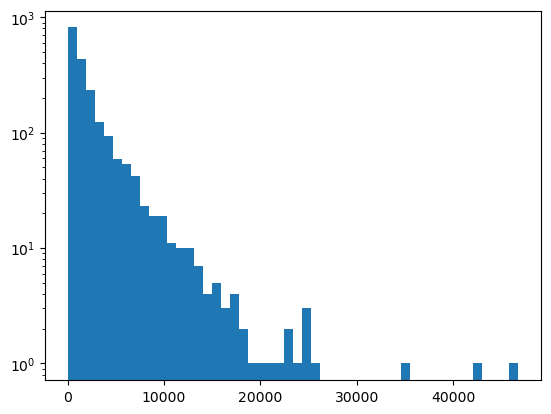

In [51]:
plt.hist(ratings_reviews_2010_2012['nbr_ratings'].unique(), 50)
plt.yscale('log')

In [62]:
ratings_reviews_groupedby_loc_style = ratings_reviews_2010_2012.groupby(['location', 'style'])

In [63]:
location_style = ratings_reviews_groupedby_loc_style.size().reset_index(name = 'number')

In [64]:
ratings_reviews_groupedby_loc = ratings_reviews_2010_2012.groupby('location').size().reset_index(name = 'total_loc_number')
ratings_reviews_groupedby_loc

,location,total_loc_number
0,Abkhazia,2
1,Afghanistan,3
2,Albania,1
3,Andorra,25
4,Argentina,83
...,...,...
164,Uruguay,81
165,Venezuela,1156
166,Vietnam,13
167,Virgin Islands (U.S.),5


In [65]:
location_style = pd.merge(location_style, ratings_reviews_groupedby_loc, on = 'location', how = 'inner')

In [67]:
location_style['popularity_percentage'] = 100* (location_style['number'] / location_style['total_loc_number'])

In [68]:
location_style

,location,style,number,total_loc_number,popularity_percentage
0,Abkhazia,German Hefeweizen,1,2,50.000000
1,Abkhazia,Zwickel/Keller/Landbier,1,2,50.000000
2,Afghanistan,Barley Wine,1,3,33.333333
3,Afghanistan,Belgian Strong Ale,1,3,33.333333
4,Afghanistan,Imperial Stout,1,3,33.333333
...,...,...,...,...,...
8264,Wales,Spice/Herb/Vegetable,3,325,0.923077
8265,Wales,Stout,15,325,4.615385
8266,Wales,Wheat Ale,2,325,0.615385
8267,Wales,Witbier,7,325,2.153846


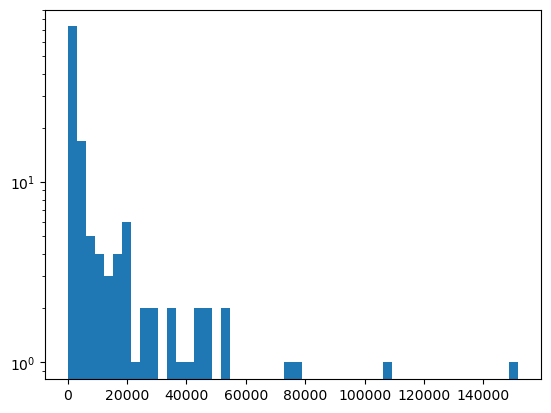

In [72]:
plt.hist(location_style['total_loc_number'].unique(), 50)
plt.yscale('log')

In [77]:
loc_num_filt = location_style['total_loc_number'] >= 5000
location_style_filtered = location_style.loc[loc_num_filt]

In [80]:
location_style_filtered['location'].unique()

array(['Australia', 'Belgium', 'Canada', 'Denmark', 'England', 'Estonia',
       'Finland', 'Germany', 'Hungary', 'Italy', 'Japan', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Scotland', 'Spain', 'Sweden',
       'Switzerland', 'United States, Arizona',
       'United States, California', 'United States, Colorado',
       'United States, Connecticut', 'United States, Florida',
       'United States, Georgia', 'United States, Idaho',
       'United States, Illinois', 'United States, Indiana',
       'United States, Iowa', 'United States, Kentucky',
       'United States, Maryland', 'United States, Massachusetts',
       'United States, Michigan', 'United States, Minnesota',
       'United States, Missouri', 'United States, New Hampshire',
       'United States, New Jersey', 'United States, New York',
       'United States, North Carolina', 'United States, Ohio',
       'United States, Oregon', 'United States, Pennsylvania',
       'United States, Tennessee', 'United States